In [1]:
#!pip install timm
import timm
from fastai.vision.widgets import *
import pandas as pd
from fastcore.all import *
from fastai.vision.all import *

In [3]:
path = Path('StanfordDogs')

In [25]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

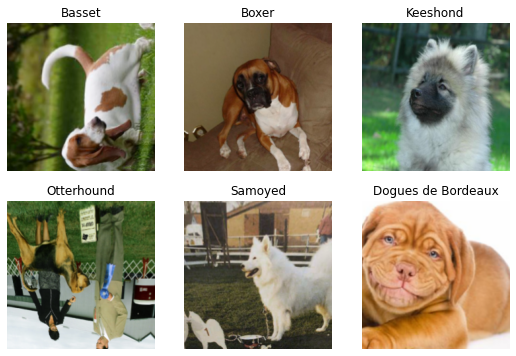

In [4]:
rand_dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(flip_vert=True),
).dataloaders(path, bs=32)

rand_dls.show_batch(max_n=6)

In [ ]:
cbs=[SaveModelCallback()]
learn = vision_learner(rand_dls, 'convnext_tiny_in22k', metrics=error_rate, cbs=cbs)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.606210,0.763981,0.238086,52:55


Better model found at epoch 0 with valid_loss value: 0.7639809846878052.


epoch,train_loss,valid_loss,error_rate,time


In [8]:
learn = vision_learner(rand_dls, 'convnext_tiny_in22k', metrics=error_rate)
learn.load('model')

/home/jong/anaconda3/lib/python3.9/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


https://images.dog.ceo/breeds/whippet/n02091134_2235.jpg


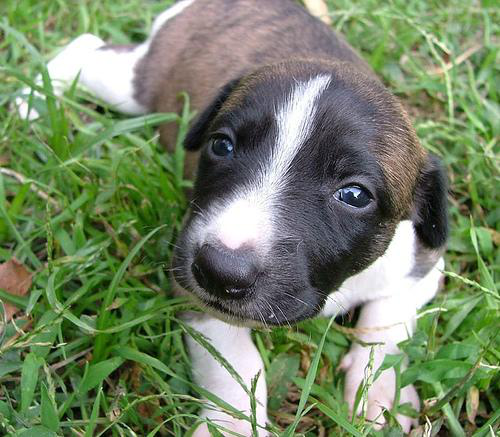

In [9]:
import requests, io

def get_dog_img(should_print=False):
    img = requests.get("https://dog.ceo/api/breeds/image/random").json()['message']
    if should_print:
        print(img)
    img = requests.get(img).content
    return PILImage.create(io.BytesIO(img))
get_dog_img(True)

In [35]:
breed,_,probs = learn.predict(get_dog_img(True))
print(f"This is a: {breed} with prob {probs[0]:.10f}")

https://images.dog.ceo/breeds/havanese/00100trPORTRAIT_00100_BURST20191126134713895_COVER.jpg


This is a: Toy Poodle with prob 0.0001317288


In [18]:
breed_, _, _prob = learn.predict(PILImage.create('laur.jpg'))
breed_, _prob[0]

('Groenendael', TensorBase(9.9951e-06))

In [19]:
from huggingface_hub import notebook_login

notebook_login()

In [20]:
from huggingface_hub import push_to_hub_fastai
push_to_hub_fastai(learner=learn, repo_id='jonathang/dog_breed')

'https://huggingface.co/jonathang/dog_breed/tree/main/'

In [ ]:
learn.dls.vocab

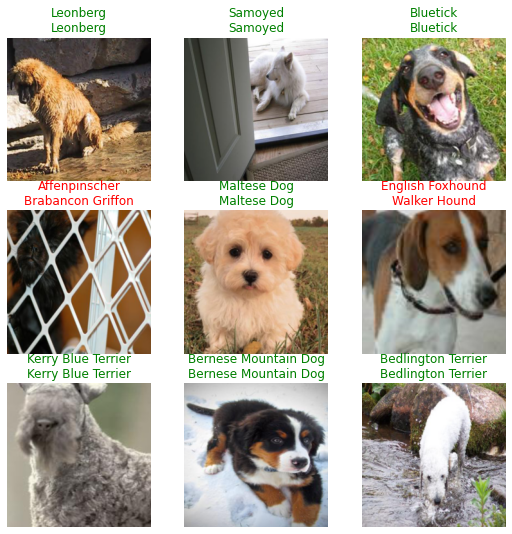

In [33]:
learn.show_results()

In [ ]:
learn.lr_find()

In [24]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

KeyboardInterrupt: 

In [23]:
interp_class = ClassificationInterpretation.from_learner(learn)
interp_class.most_confused()

KeyboardInterrupt: 

In [22]:
import fastai.vision.widgets
cleaner = fastai.vision.widgets.ImageClassifierCleaner(learn)
cleaner

KeyboardInterrupt: 